<a href="https://colab.research.google.com/github/wulanika/TugasUasMachineLearning/blob/main/revisi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, precision_score, confusion_matrix, roc_curve, auc
from imblearn.over_sampling import SMOTE
import nltk
import re
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.stem import PorterStemmer


In [3]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [4]:
df = pd.read_csv('/content/drive/MyDrive/dataset/Ulta Skincare Reviews.csv')

In [19]:
df = df.dropna(subset=['Review_Text'])

In [20]:
df.dropna()

,Review_Title,Review_Text,Verified_Buyer,Review_Date,Review_Location,Review_Upvotes,Review_Downvotes,Product,Brand,Scrape_Date,score,sentiment
0,Perfect,love use face shower heat give light scrub nice,No,15 days ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23,0.7906,1
1,You need this,even better daili microfoli obsess skin much s...,No,27 days ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23,0.2263,1
2,Clean skin,enjoy product much look forward use realli fee...,No,2 months ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23,0.8074,1
3,Love This Stuff!,never tri anyth like love appli face get littl...,No,2 months ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23,0.7839,1
4,This exfoliates very nicely and,exfoli nice give smooth skin irrit reaction sk...,No,2 months ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23,0.6486,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4145,I would buy this product again,much better product scrub,Yes,7 years ago,"vernon hills, il",0,1,Daily Microfoliant,Dermalogica,3/27/23,0.4404,1
4146,Gentle exfoliant- leaves skin smooth & soft,use exfoli month depend condit skin use anywhe...,No,7 years ago,"Humboldt, CA",1,0,Daily Microfoliant,Dermalogica,3/27/23,0.5100,1
4147,One of my favorite skincare products of all time.,skin look better 10 year ago,Yes,7 years ago,"Albuquerque, NM",2,1,Daily Microfoliant,Dermalogica,3/27/23,0.4404,1
4148,Ehhh...,product useless known exfoli use daili would g...,Yes,7 years ago,Fayetteville,1,1,Daily Microfoliant,Dermalogica,3/27/23,0.1027,1


In [6]:
df['Review_Text'] = df['Review_Text'].astype(str)
df['Review_Text'] = df['Review_Text'].apply(lambda x: x.lower())
df['Review_Text'] = df['Review_Text'].apply(lambda x: re.sub('[^a-zA-Z0-9]', ' ', x))
df['Review_Text'] = df['Review_Text'].apply(lambda x: word_tokenize(x))
df['Review_Text'] = df['Review_Text'].apply(lambda x: [word for word in x if word not in stopwords.words('english')])

ps = PorterStemmer()
df['Review_Text'] = df['Review_Text'].apply(lambda x: [ps.stem(y) for y in x])
df['Review_Text'] = df['Review_Text'].apply(lambda x: ' '.join(x))


In [8]:
!pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()
df['score'] = df['Review_Text'].apply(lambda x: sia.polarity_scores(x)['compound'])
df['sentiment'] = df['score'].apply(lambda x: 1 if x > 0 else 0)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 3.6 MB/s eta 0:00:00


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [9]:
print(df['sentiment'].value_counts())

sentiment
1    3506
0     641
Name: count, dtype: int64


In [10]:
X = df['Review_Text']
y = df['sentiment']
cv = TfidfVectorizer()
X = cv.fit_transform(X)

In [11]:
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)


In [12]:
x_train, x_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.30, random_state=42)


In [13]:
model = MultinomialNB()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [14]:
precision = precision_score(y_test, y_pred, average='macro')
print(f"MultinomialNB Precision: {precision}")
print(classification_report(y_test, y_pred))

MultinomialNB Precision: 0.8731802244274209
              precision    recall  f1-score   support

           0       0.96      0.73      0.83      1057
           1       0.78      0.97      0.87      1047

    accuracy                           0.85      2104
   macro avg       0.87      0.85      0.85      2104
weighted avg       0.87      0.85      0.85      2104



[[ 774  283]
 [  29 1018]]


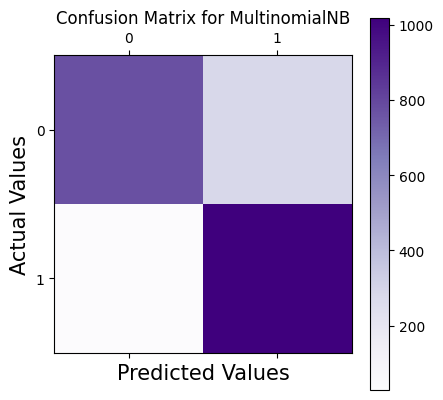

In [15]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

plt.matshow(cm, cmap=plt.cm.Purples)
plt.colorbar()
plt.ylabel('Actual Values', fontsize=15)
plt.xlabel('Predicted Values', fontsize=15)
plt.title('Confusion Matrix for MultinomialNB')
plt.show()

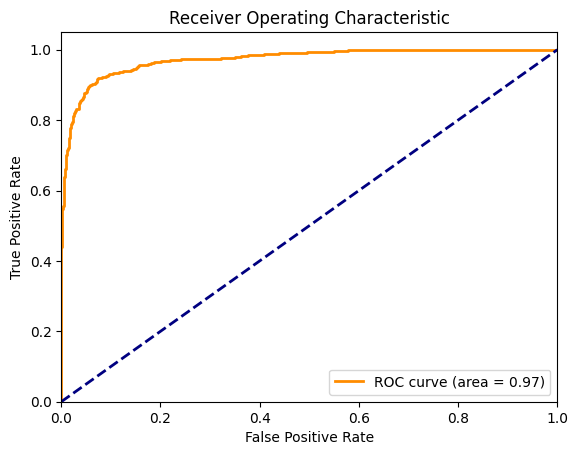

In [16]:
y_proba = model.predict_proba(x_test)
fpr, tpr, _ = roc_curve(y_test, y_proba[:, 1], pos_label=model.classes_[1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:0.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()